In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#viewig the dataset
df = pd.read_csv('mcdonalds_dataset.csv')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
#finding the shape
df.shape

(1453, 15)

In [5]:
#checking for the datatypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [6]:
# getting the value counts of 'Like'
df['Like'].value_counts()

Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64

In [7]:
# getting the value counts of 'Age'
df['Age'].value_counts()

Age
55    53
60    38
37    37
59    36
57    36
52    36
58    35
36    35
49    34
62    34
50    34
32    33
44    32
56    32
64    32
53    31
26    31
24    30
35    30
51    30
47    30
42    30
23    30
39    29
29    28
34    28
30    28
38    27
40    27
31    27
25    26
33    26
61    26
67    26
48    26
43    25
27    25
63    25
54    24
41    23
22    23
65    23
45    22
20    21
46    19
28    18
66    17
21    16
18    16
70    15
69    14
68    13
19    10
71     1
Name: count, dtype: int64

In [8]:
# getting the value counts of 'VisitFrequency'
df['VisitFrequency'].value_counts()

VisitFrequency
Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: count, dtype: int64

In [9]:
# getting the value counts of 'Gender'
df['Gender'].value_counts()

Gender
Female    788
Male      665
Name: count, dtype: int64

# Exploratory Data Analysis

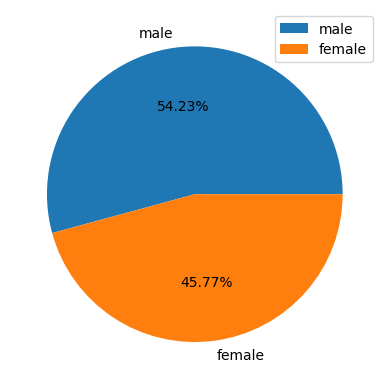

In [15]:
labels=['male','female']
size=df['Gender'].value_counts()
plt.pie(size, labels=labels, autopct="%.2f%%")
plt.legend()
plt.show()

In [30]:
y = df['Age'].value_counts()
x = y.index

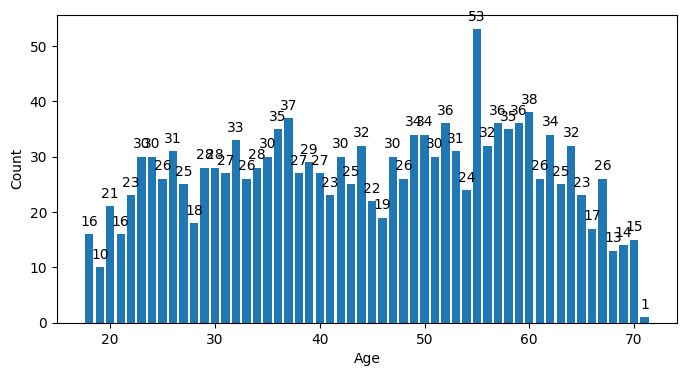

In [32]:
plt.figure(figsize=(8,4))
plt.bar(x,y)
plt.xlabel('Age')
plt.ylabel('Count')
for i, count in enumerate(y):
    plt.text(x[i], count + 1, str(count), ha='center', va='bottom')
plt.show()

In [33]:
#replacing string values into categorical values
df["Like"]=df["Like"].replace({'I hate it!-5': '-5', 'I love it!+5':'+5'})
df.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

In [36]:
#converting all string type data values into categorical using label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns = ["yummy", "convenient", "spicy", "fattening", "greasy", "fast", "cheap", "tasty", "expensive", "healthy", "disgusting"]
for i in columns:
    df[i]=le.fit_transform(df[i])

In [37]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


array([[<Axes: title={'center': 'yummy'}>,
        <Axes: title={'center': 'convenient'}>,
        <Axes: title={'center': 'spicy'}>],
       [<Axes: title={'center': 'fattening'}>,
        <Axes: title={'center': 'greasy'}>,
        <Axes: title={'center': 'fast'}>],
       [<Axes: title={'center': 'cheap'}>,
        <Axes: title={'center': 'tasty'}>,
        <Axes: title={'center': 'expensive'}>],
       [<Axes: title={'center': 'healthy'}>,
        <Axes: title={'center': 'disgusting'}>,
        <Axes: title={'center': 'Age'}>]], dtype=object)

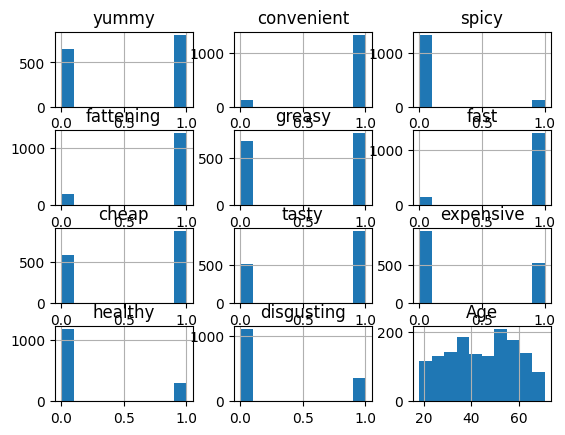

In [38]:
df.hist()

In [42]:
#scaling the range of values between 0 to 1 using MinMax Scaler
x = df.drop(['Like','Age','VisitFrequency','Gender'],axis=1)
x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0., 1., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       ...,
       [1., 1., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 1.]])

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
pc = pca.fit_transform(x_scaled)
names=["pc1", "pc2", "pc3", "pc4", "pc5", "pc6", "pc7", "pc8", "pc9", "pc10", "pc11"]
pf = pd.DataFrame(data=pc, columns=names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [57]:
#calculating the standard deviation of each column in pf dataframe
std_list = []
for i in names:
    std_list.append(np.std(pf[i]))
print("Standard Deviation")
np.array(std_list)

Standard Deviation


array([0.75678896, 0.60724649, 0.50444578, 0.39866134, 0.33728888,
       0.31016782, 0.28959761, 0.27502727, 0.2651598 , 0.24875617,
       0.23682131])

In [58]:
pov = pca.explained_variance_ratio_
print("Proportion of Variance")
pov

Proportion of Variance


array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [59]:
cp = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Proportion")
cp

Cumulative Proportion


array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

In [60]:
components = pca.components_
num_pc = pca.n_features_
pc_name = ["PC"+str(i) for i in range(1, num_pc+1)]
loadings_df = pd.DataFrame

C:\Users\angad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


C:\Users\angad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\angad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\angad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\angad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

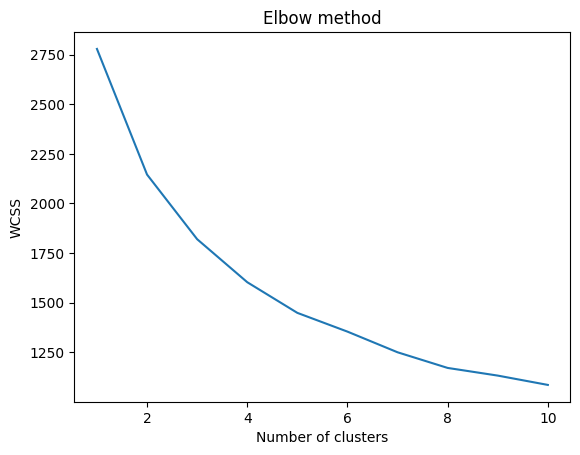

In [61]:
#finding the optimal number of clusters using k-means clustering
from sklearn.cluster import KMeans

wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(pf)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [63]:
#K-means clustering 

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(x)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.

[0 2 2 ... 2 1 3]
1602.9303457472056
9
[[0.02265372 0.89320388 0.0776699  0.92556634 0.66019417 0.95145631
  0.91909385 0.15533981 0.01294498 0.07119741 0.38511327]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.85185185 0.95987654 0.13271605 0.90432099 0.61728395 0.85802469
  0.10802469 0.93209877 0.89814815 0.2037037  0.10493827]
 [0.02083333 0.67916667 0.07916667 0.91666667 0.70833333 0.74583333
  0.06666667 0.08333333 0.89583333 0.0625     0.72916667]]


C:\Users\angad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [64]:
from collections import Counter
Counter(kmeans.labels_)

Counter({1: 580, 2: 324, 0: 309, 3: 240})

In [70]:
# correlation coefficient between original variables and the component

loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = x.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

C:\Users\angad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


In [72]:
df1=pd.get_dummies(df, prefix=['cluster_num'], columns=['cluster_num'])
df1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num_0,cluster_num_1,cluster_num_2,cluster_num_3
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,True,False,False,False
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,False,False,True,False
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,False,False,True,False
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,False,True,False,False
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male,False,False,False,True
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female,False,True,False,False
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female,False,False,True,False
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male,False,True,False,False


In [75]:
#Gender
result=[]
for i in columns:
    Gender = df.groupby(['cluster_num'])[i].mean()
    Gender = Gender.to_frame().reset_index()
    result.append(Gender)

In [76]:
for i in range(len(result)):
    print(pd.DataFrame(result[i]))

   cluster_num     yummy
0            0  0.022654
1            1  0.887931
2            2  0.851852
3            3  0.020833
   cluster_num  convenient
0            0    0.893204
1            1    0.981034
2            2    0.959877
3            3    0.679167
   cluster_num     spicy
0            0  0.077670
1            1  0.086207
2            2  0.132716
3            3  0.079167
   cluster_num  fattening
0            0   0.925566
1            1   0.794828
2            2   0.904321
3            3   0.916667
   cluster_num    greasy
0            0  0.660194
1            1  0.329310
2            2  0.617284
3            3  0.708333
   cluster_num      fast
0            0  0.951456
1            1  0.960345
2            2  0.858025
3            3  0.745833
   cluster_num     cheap
0            0  0.919094
1            1  0.922414
2            2  0.108025
3            3  0.066667
   cluster_num     tasty
0            0  0.155340
1            1  0.975862
2            2  0.932099
3         

In [77]:
df1=pd.get_dummies(df, prefix=['VisitFrequency'], columns=['VisitFrequency'])
df1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,...,Like,Age,Gender,cluster_num,VisitFrequency_Every three months,VisitFrequency_More than once a week,VisitFrequency_Never,VisitFrequency_Once a month,VisitFrequency_Once a week,VisitFrequency_Once a year
0,0,1,0,1,0,1,1,0,1,0,...,-3,61,Female,0,True,False,False,False,False,False
1,1,1,0,1,1,1,1,1,1,0,...,+2,51,Female,2,True,False,False,False,False,False
2,0,1,1,1,1,1,0,1,1,1,...,+1,62,Female,2,True,False,False,False,False,False
3,1,1,0,1,1,1,1,1,0,0,...,+4,69,Female,1,False,False,False,False,True,False
4,0,1,0,1,1,1,1,0,0,1,...,+2,49,Male,0,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,...,-5,47,Male,3,False,False,False,False,False,True
1449,1,1,0,1,0,0,1,1,0,1,...,+2,36,Female,1,False,False,False,False,True,False
1450,1,1,0,1,0,1,0,1,1,0,...,+3,52,Female,2,False,False,False,True,False,False
1451,1,1,0,0,0,1,1,1,0,1,...,+4,41,Male,1,True,False,False,False,False,False


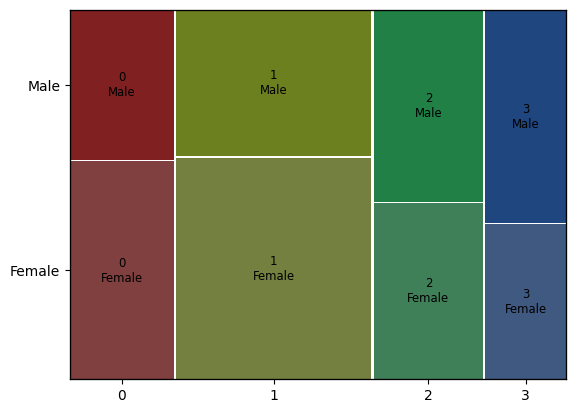

In [84]:
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
crosstab =pd.crosstab(df['cluster_num'],df['Gender'])
#Reordering cols
crosstab = crosstab[['Female', 'Male']]
mosaic(crosstab.stack())
plt.show()

<Axes: xlabel='cluster_num', ylabel='Age'>

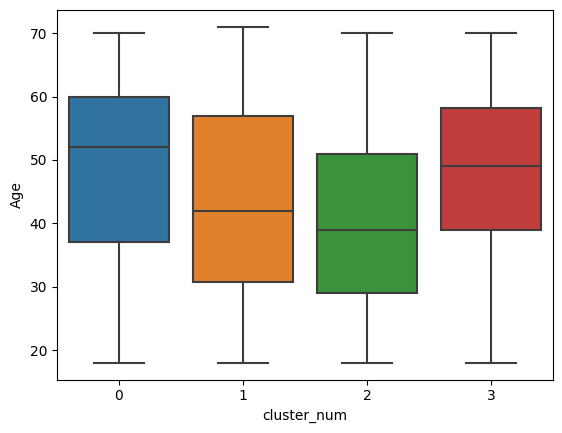

In [87]:
sns.boxplot(x='cluster_num', y='Age', data=df1)